In [1]:
import pickle
import pandas as pd
import os
from glob import glob
import tqdm
import numpy as np
import torch
import json
import umap.umap_ as umap
import matplotlib.pyplot as plt
import matplotlib
import seaborn as sns
from mpl_toolkits.mplot3d import Axes3D
from matplotlib.legend import Legend
from sklearn.manifold import TSNE
from sklearn.model_selection import train_test_split
from sklearn import metrics


/idiap/home/ibmahmoud/.local/lib/python3.9/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [2]:
import sys
sys.path.append("../../")
from meerkats import config


In [3]:
distinct_colors_22 = ['#e6194b', '#3cb44b', '#ffe119', '#4363d8', '#f58231', 
                      '#911eb4', '#46f0f0', '#f032e6', '#bcf60c', '#fabebe', 
                      '#008080', '#e6beff', '#9a6324', '#fffac8', '#800000', 
                      '#aaffc3', '#808000', '#ffd8b1', '#000075', '#808080', 
                      '#ffffff', '#000000']

UMAP AND TSNE FUNCTION

In [35]:
def umap_apply_2Dplot(embeddings,labels,n_neighbors=15, outname=None,ax=ax):

    
    """
    Function that creates (and saves) 3D plot from an
    input dataset, color-colored by the provided labels.

    Parameters
    ----------
    embeddings : NxL array with N number of samples and L dim of features
                
    labels: 1D numpy array (numeric) of labels, L as dim 

    neighbors : neighbors parameter of umap
          
    mycolors: String or List-of-Strings
              Seaborn color palette name (e.g. "Set2") or list of
              colors (Hex value strings) used for coloring datapoints
              (e.g. ["#FFEBCD","#0000FF",...])
                     
    outname: String
             Output filename at which plot will be saved
             No plot will be saved if outname is None
             (e.g. "my_folder/my_img.png")
             
 
                
    Returns
    -------
    
    -
             
    """   
    umaps=umap.UMAP(n_components=2,n_neighbors=n_neighbors).fit_transform(embeddings)
    
    num_classes=len(np.unique(labels))
    
    sns.scatterplot( x=umaps[:,0],
    y= umaps[:,1],
    hue=labels,
    palette=sns.color_palette("hls", num_classes),
    legend=False, alpha=0.3, ax=ax)

    ax.set_xlabel('UMAP1')
    ax.set_ylabel('UMAP2')
    
        
    if outname: plt.savefig(outname, facecolor="white")


In [4]:
def plot_tsne(embeddings,labels,perp=30,outname=None,ax=None):

    """
    Function that creates (and saves) 2D plot from an
    input dataset..

    Parameters
    ----------
    embeddings : NxL array with N number of samples and L dim of features
                
    labels: 1D numpy array (numeric) of labels, L as dim 

    perp : perplexity parameter of tsne
          
    ax : axis of matplotlib if subplot
                     
    outname: String
             Output filename at which plot will be saved
             No plot will be saved if outname is None
             (e.g. "my_folder/my_img.png")
             
 
                
    Returns
    -------
    
    -
             
    """ 
    
    tsne=TSNE(n_components=2,perplexity=perp)
    
    sne=tsne.fit_transform(embeddings)

    num_classes=len(np.unique(labels))
    
    sns.scatterplot(
    x=sne[:,0],
    y= sne[:,1],
    hue=labels,
    palette=sns.color_palette("hls", num_classes),
    legend=False,
    alpha=0.3,
    ax=ax)
    
    ax.set_xlabel('TSNE1')
    ax.set_ylabel('TSNE2')



READ THE FEATURES

In [72]:
features=pd.read_csv(config.FEATURES_DIR + "lastlayerisabel.csv",header=None,index_col=0) # which features set to plot, change everytime

embeddings=features.iloc[:,:-1].to_numpy()
labels=features.iloc[:,-1].to_numpy()

/idiap/temp/ibmahmoud/miniconda3/envs/meerkats/lib/python3.9/site-packages/sklearn/manifold/_t_sne.py:795: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  warnings.warn(
/idiap/temp/ibmahmoud/miniconda3/envs/meerkats/lib/python3.9/site-packages/sklearn/manifold/_t_sne.py:805: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  warnings.warn(
/idiap/temp/ibmahmoud/miniconda3/envs/meerkats/lib/python3.9/site-packages/sklearn/manifold/_t_sne.py:795: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  warnings.warn(
/idiap/temp/ibmahmoud/miniconda3/envs/meerkats/lib/python3.9/site-packages/sklearn/manifold/_t_sne.py:805: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  warnings.warn(
/idiap/temp/ibmahmoud/miniconda3/envs/meerkats/lib/python3.9/site-packages/sklearn/manifold/_t_sne.py:795: FutureWarning: The default init

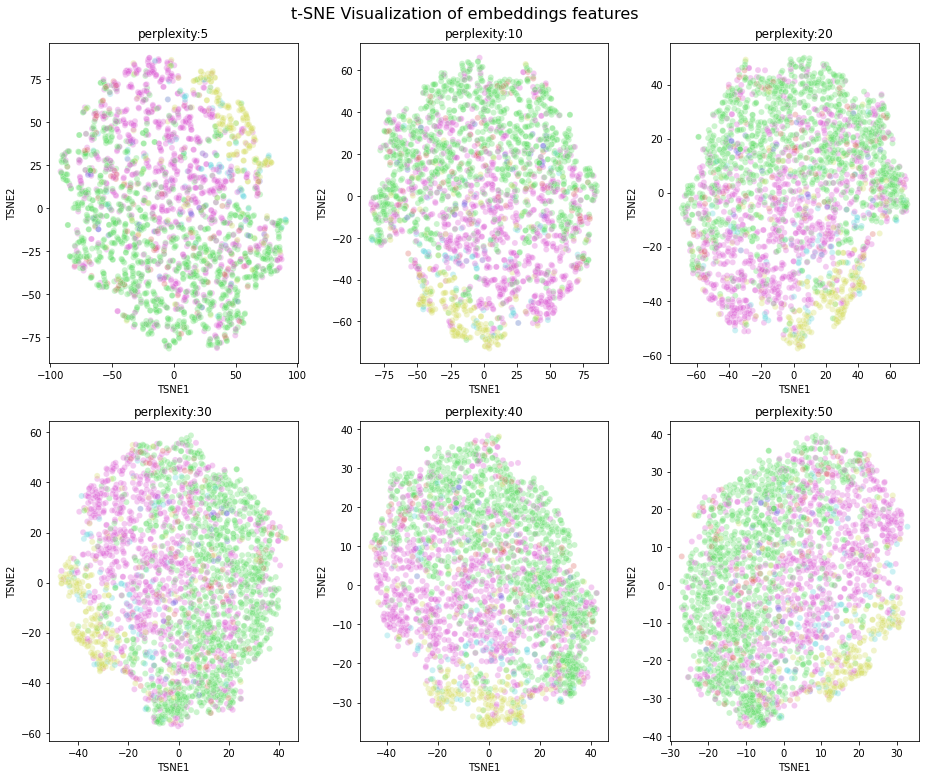

In [73]:
fig,axes=plt.subplots(2,3,figsize=(13,11))
perplexity=[5,10,20,30,40,50]
for i, ax in enumerate(axes.flat):
    perplexity_value=perplexity[i]
    plot_tsne(embeddings=embeddings,labels=labels,perp=perplexity_value,ax=ax)
    ax.set_title("perplexity:{}".format(perplexity_value))

fig.suptitle("t-SNE Visualization of embeddings features", fontsize=16)
fig.tight_layout()

plt.savefig("Tsne_isabel_lastlayer.png",facecolor="white")

plt.show()



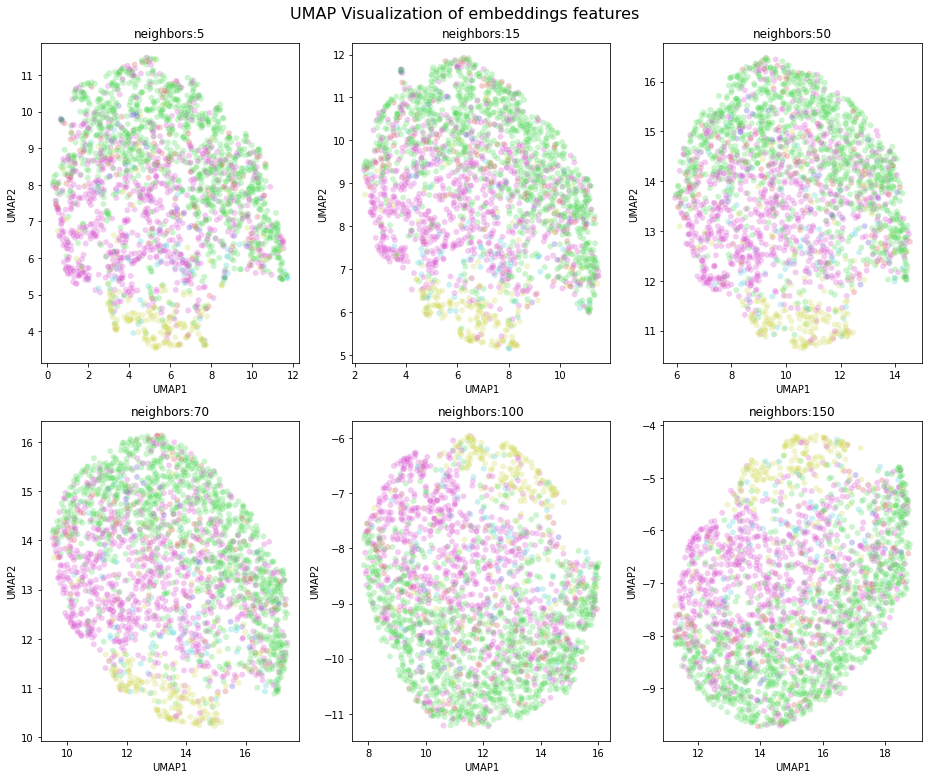

In [75]:
fig,axes=plt.subplots(2,3,figsize=(13,11))
neighbors=[5,15,50,70,100,150]
for i, ax in enumerate(axes.flat):
    neighbors_=neighbors[i]
    umap_apply_2Dplot(embeddings,labels, n_neighbors=neighbors_, outname=None, ax=ax)

    ax.set_title("neighbors:{}".format(neighbors_))

fig.suptitle("UMAP Visualization of embeddings features", fontsize=16)
fig.tight_layout()
plt.savefig("Umaplastlayer_isabel.png",facecolor="white")
plt.show()

    



STUDY ON THE SSL FEATURES

In [ ]:
#config.GITROOT="/idiap/project/evolang/meerkats_imen/evolang_meerkats_calls_classification/workspace/"
DATADIR_SLL=config.DATASSL
mara_ssl=os.path.join(DATADIR_SLL,"test")

all_files=glob(mara_ssl + "*.pkl", recursive=True)



In [ ]:
with open(config.GITROOT + '/meerkats/src/data/class_to_index_mara.json') as f:
    class_to_index = json.load(f)
    
info_file=pd.read_csv(config.GITROOT+ "lib/mara-code/data/info_file.csv",sep=";")

    

In [ ]:
embeddingsm=torch.empty(0,768)
labelsm=np.array(())
for emb in all_files:
    with open(emb,"rb") as handle:
        x=pd.read_pickle(emb)
        features_dict=pickle.load(handle)


    filename=emb.split("/")[-1].replace("pkl","wav")

    result = info_file.loc[info_file['filename'] == filename, 'label'].values[0]
    label=class_to_index[result]
    
    layer=features_dict["tfmr_1"]

    #result=torch.cat((torch.mean(layer,dim=0),torch.std(layer,dim=0)))
    labelsm=np.append(labelsm,[label]*layer.shape[0])
    embeddingsm=torch.cat((embeddingsm,layer),dim=0)


In [ ]:
embeddings=np.empty((0,768))
labels=np.array(())
for emb in all_files:
    with open(emb,"rb") as handle:
        x=pd.read_pickle(emb)
        features_dict=pickle.load(handle)

    layer=features_dict["tfmr_1"]
    #result=torch.cat((torch.mean(layer,dim=0),torch.std(layer,dim=0)))

    filename=emb.split("/")[-1]
    class_name=filename.split(".")[0]
    label=class_to_index[class_name]
    
    
    
    labels=np.append(labels,[label]*layer.shape[0])
    embeddings=np.append(embeddings,layer,axis=0)
